# Erzeugen Synthetischer Bilddaten


In [1]:
#Import der Pakete
import os
import cv2
import PIL
from PIL import Image
import numpy as np
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from skimage import img_as_ubyte
%matplotlib inline
import random

In [4]:
#Read and show Image
import glob
#Einlesepfad
path1 = glob.glob("F:/Projektseminar/Augmented_Images/kaputtebilder/Helligkeit/*.jpg")  
#Einlesepfad Name
pathName="F:/Projektseminar/Augmented_Images/kaputtebilder/Helligkeit/"

#Speicherpfad Schärfe
path= "F:/Projektseminar/Augmented_Images/kaputtebilder/repariert/" 

Automatisches Entfernen des *.jpg nicht möglich, da es eine Liste aus allen Dateipfaden aller Bilder und kein String ist

In [22]:
#Test der Umbenennung
import os
n=0
type(path)
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #Isolation der Bildbenennung
    name=os.listdir(pathName)[n]
    print(name)
    #Zerlegung der Bildbenennung
    vorne= name[0:8]
    hinten= name[9:37]
    mod= name[8] 
    mod=1
    mod=str(mod)
    res=vorne+mod+hinten
    print(res)
    n=n+1

EZB.jpg


IndexError: string index out of range

Infos: 
Nomenklatur der Bilder: "C:\Users\bened\OneDrive - Universität Würzburg\PJS - Intern\Neuronale Netze\Infos etc\Bennenung Dateinamen Bilder.xlsx"
Python String Operations: https://www.w3schools.com/python/python_ref_string.asp
https://www.programiz.com/python-programming/string

In [4]:
#Dekodierung der Bildbenennung
#unter Bedingung, dass Baustellen ID, Wand ID und BildID =einstellig: 
from re import X


st_spi_ver=8 #Position des horizontalen Spiegelns
st_rot=10
P=12
P=14
P=16
P=18
P=20
P=22
P=24

In [8]:
print(len(name))

TypeError: 'int' object is not callable

In [10]:
#Spieglen horizontal
#Einlesepfad
path1 = glob.glob("F:/Projektseminar/Augmented_Images/Rauschen/*.jpg") 
#Einlesepfad Name
pathName="F:/Projektseminar//Augmented_Images/Rauschen/"

#Speicherpfad Spiegeln+Rauschen
path= "F:/Projektseminar/Augmented_Images/Spiegeln+Rauschen/"

img_number=1
n=0
for file in path1:
    img= io.imread(file) #img1
    img=img_as_ubyte(img) #Convert an image to unsigned byte format, with values in [0, 255].
    #cv2.imshow("Image",img)
    a=img
    a = cv2.flip(img, 1)
    #img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#Anzeigen des Bildes
    #plt.imshow(a)
#Isolation der Bildbenennung
    name=os.listdir(pathName)[n]
    #print("Pathname= ", name)
    length=len(name)
    #print("länge des Namen= ", len)
#Zerlegung der Bildbenennung
    if length==35:
        vorne= name[0:8] # 0:(st_spi_ver)
        #print("Vorne=", vorne)
        hinten= name[9:] #  (st_spi_ver+1):length
        #print("Hinten=", hinten)
        mod= name[8] # st_spi_ver
        #print("mod=", mod)
    elif length==36:
        vorne= name[0:9]
        hinten= name[10:]
        mod= name[9]
    elif length==37:
        vorne= name[0:10]
        hinten= name[11:]
        mod= name[10]
    elif length==38:
        vorne= name[0:11]
        hinten= name[12:]
        mod= name[11]     

    mod=2
    mod=str(mod)
    res=vorne+mod+hinten
    #print("res=", res)
    n=n+1
#Speichern
    #cv2.imwrite(os.path.join(path+res), a)
    io.imsave(os.path.join(path+res), a)


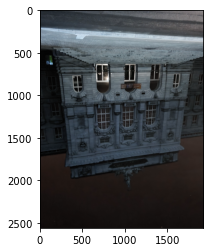

In [6]:
#Spieglen vertikal
img_number=1
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    #hier die Methode
    b=img
    b = cv2.flip(img, 0)
    plt.imshow(b)
    cv2.imwrite(os.path.join(path+"Mirr_Ver"+str(img_number)+".jpg"), b)
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()


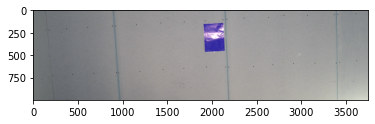

In [14]:
#Versuch des Crops
img=cv2.imread("F:/Projektseminar/Bildsammlung_Umbenennung/Adaptive Crop/3Grad.jpg")
img= img[1000: 2000, 0: ]
plt.imshow(img)

Rotieren: 5*Zufällig

In [11]:
#Rotation
from scipy.ndimage import rotate
from scipy.misc import face
from matplotlib import pyplot as plt
import random
from PIL import Image
n=0
img_number=1
i=4
while i< 5:
    for file in path1:
        img1= io.imread(file) #cv2.
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        img1 = img
        angle=random.randint(-3,3)
        rot = rotate(img1, angle, reshape=False) #falls originale Bildgröße beibehalten werden soll: reshape=false
        #aber dann werden Bereiche des Bildes abgeschnitten
        #So weit reinzoomen, dass die schwarzen Bereiche des Bildes verschwinden
    #Zoom zum Entfernen der schwarzen Randbereiche:
        Betrag=abs(angle)
        if Betrag==1:
            rot= rot[33: 2966, 45: 3955] #img=img.crop((45, 33 , 3955, 2966))
        elif Betrag==2:
            rot= rot[66: 2933, 87: 3913] #img=img.crop((87, 66 , 3913, 2933))
        elif Betrag==3:
            rot= rot[96: 2905, 127: 3873] #img=img.crop((127, 96 , 3873, 2905))
    #Resize
        rot= cv2.resize(rot, (4000, 3000))
    #Isolation der Bildbenennung
        name=os.listdir(pathName)[n]
        print("Pathname= ", name)
        length=len(name)
        print("länge des Namen= ", len)
    #Zerlegung der Bildbenennung
        if length==35:
            vorne= name[0:10] # 0:(st_spi_ver)
            #print("Vorne=", vorne)
            hinten= name[11:] #  (st_spi_ver+1):length
            #print("Hinten=", hinten)
            mod= name[10] # st_spi_ver
            #print("mod=", mod)
        elif length==36:
            vorne= name[0:11]
            hinten= name[12:]
            mod= name[11]
        elif length==37:
            vorne= name[0:12]
            hinten= name[13:]
            mod= name[12]
        elif length==38:
            vorne= name[0:13]
            hinten= name[14:]
            mod= name[13]     

        mod=2 
        mod=str(mod)
        res=vorne+mod+hinten
        print("res=", res)
        n=n+1
    #Speichern
        io.imsave(os.path.join(path+res), rot) #cv2.
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

#fig, ax = plt.subplots(1, 2)
#ax[0].imshow(img1)
#ax[1].imshow(rot)

Pathname=  1_1_10_10_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_10_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_11_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_11_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_12_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_12_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_13_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_13_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_14_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_14_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_15_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_15_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_16_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_16_1_2_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_17_1_1_1_1_1_1_1_1_1_1_1_2.jpg
länge des Nam

In [6]:
#Random Rauschen: Salt and Pepper
from skimage.util import random_noise
n=0
img_number=1
i=2
while i< 3:
    for file in path1:
        img1= io.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        noise_img=random_noise(img, mode='s&p', amount=0.2)
        noise_img=np.array(255*noise_img, dtype= 'uint8')
        #plt.imshow(noise_img)
    #Isolation der Bildbenennung
        name=os.listdir(pathName)[n]
        #print("Pathname= ", name)
        length=len(name)
        #print("länge des Namen= ", len)
    #Zerlegung der Bildbenennung
        if length==35:
            vorne= name[0:12] # 0:(st_spi_ver) 12
            #print("Vorne=", vorne)
            hinten= name[13:] #  (st_spi_ver+1):length 13
            #print("Hinten=", hinten)
            mod= name[12] # st_spi_ver 12
            #print("mod=", mod)
        elif length==36:
            vorne= name[0:13]
            hinten= name[14:]
            mod= name[13]
        elif length==37:
            vorne= name[0:14]
            hinten= name[15:]
            mod= name[14]
        elif length==38:
            vorne= name[0:15]
            hinten= name[16:]
            mod= name[15]     

        mod=2
        mod=str(mod)
        res=vorne+mod+hinten
        #print("res=", res)
        n=n+1
    #Speichern
        io.imsave(os.path.join(path+res), noise_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

Pathname=  1_1_10_10_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_10_1_1_7.7_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_10_11_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_10_11_1_1_7.7_1_1_1_1_1_1_2_1_1.jpg


KeyboardInterrupt: 

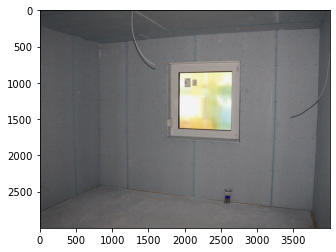

In [5]:
#!!!Random Noise: Gaussean Noise
from skimage.util import random_noise
n=0
i=2
while i< 3:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        random_noise1=random_noise(img, mode='gaussian', seed=None, clip=True) #Amount kann bei Gauss nicht geändert werden
        noise_img=np.array(255*random_noise1, dtype= 'uint8')
        plt.imshow(noise_img)
    #Isolation der Bildbenennung
        name=os.listdir(pathName)[n]
        print("Pathname= ", name)
        length=len(name)
        print("länge des Namen= ", len)
    #Zerlegung der Bildbenennung
        if length==35:
            vorne= name[0:12] # 0:(st_spi_ver)
            print("Vorne=", vorne)
            hinten= name[13:] #  (st_spi_ver+1):length
            print("Hinten=", hinten)
            mod= name[12] # st_spi_ver
            print("mod=", mod)
        elif length==36:
            vorne= name[0:13]
            hinten= name[14:]
            mod= name[13]
        elif length==37:
            vorne= name[0:14]
            hinten= name[15:]
            mod= name[14]
        elif length==38:
            vorne= name[0:15]
            hinten= name[16:]
            mod= name[15]     

        mod=7.7
        mod=str(mod)
        res=vorne+mod+hinten
        print("res=", res)
        n=n+1
    #Speichern
        cv2.imwrite(os.path.join(path+res), noise_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

In [3]:
#Farbraumtransformation: Verändern der Helligkeit
#Speicherpfad Helligkeit
#path= "F:/Projektseminar/Augmented_Images/Helligkeit/"
#Quelle:  @Online{bill grates_2017, title={How to fast change image brightness with python + opencv?}, url={https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv}, journal={Stack Overflow}, author={Bill Grates}, year={2017}, month={Nov}} 

def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

#Dunkler
n=0
img_number=1
i=6 #Startwert für Anzahl der Durchläufe
BR_CN=-30 #Startwert der Helligkeit
while i< 7:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        BR_CN_File=str(BR_CN) #Conversion von Int zu String for Filename
        img2 = change_brightness(img, value=BR_CN) #increases
        #plt.imshow(img2)
            #Isolation der Bildbenennung
        name=os.listdir(pathName)[n]
        #print("Pathname= ", name)
        length=len(name)
        #print("länge des Namen= ", len)
    #Zerlegung der Bildbenennung
        if length==35:
            vorne= name[0:16] # 0:(st_spi_ver)
            #print("Vorne=", vorne)
            hinten= name[17:] #  (st_spi_ver+1):length
            #print("Hinten=", hinten)
            mod= name[16] # st_spi_ver
            #print("mod=", mod)
        elif length==36:
            vorne= name[0:17]
            hinten= name[18:]
            mod= name[17]
        elif length==37:
            vorne= name[0:18]
            hinten= name[19:]
            mod= name[18]
        elif length==38:
            vorne= name[0:19]
            hinten= name[20:]
            mod= name[19]     

        mod=3
        mod=str(mod)
        res=vorne+mod+hinten
        #print("res=", res)
        n=n+1
    #Speichern
        cv2.imwrite(os.path.join(path+res), img2)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    #BR_CN=BR_CN+60          #Erhöhung der Helligkeit pro Durchlauf (i)
    i=i+1


#Heller
n=0
i=6
BR_CN=30 #Startwert der Helligkeit
while i< 7:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        BR_CN_File=str(BR_CN) #Conversion von Int zu String for Filename
        img2 = change_brightness(img, value=BR_CN) #increases
        #plt.imshow(img2)
    #Isolation der Bildbenennung
        name=os.listdir(pathName)[n]
        #print("Pathname= ", name)
        length=len(name)
        #print("länge des Namen= ", len)
    #Zerlegung der Bildbenennung
        if length==35:
            vorne= name[0:16] # 0:(st_spi_ver)
            #print("Vorne=", vorne)
            hinten= name[17:] #  (st_spi_ver+1):length
            #print("Hinten=", hinten)
            mod= name[16] # st_spi_ver
            #print("mod=", mod)
        elif length==36:
            vorne= name[0:17]
            hinten= name[18:]
            mod= name[17]
        elif length==37:
            vorne= name[0:18]
            hinten= name[19:]
            mod= name[18]
        elif length==38:
            vorne= name[0:19]
            hinten= name[20:]
            mod= name[19]     

        mod=2
        mod=str(mod)
        res=vorne+mod+hinten
        #print("res=", res)
        n=n+1
    #Speichern
        cv2.imwrite(os.path.join(path+res), img2)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    #BR_CN=BR_CN+60 #Erhöhung der Helligkeit pro Durchlauf (i)
    i=i+1

In [ ]:
#Kernel Filter: 

#Quelle:  @Online{brian burns_2016, title={How can I sharpen an image in opencv?}, url={https://stackoverflow.com/questions/4993082/how-can-i-sharpen-an-image-in-opencv}, journal={Stack Overflow}, author={Brian Burns}, year={2016}, month={Aug}} 

#Schärfen
n=0
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharp_img = cv2.filter2D(img, -1, kernel) #Applikation des Kernels
    #plt.imshow(sharp_img)
#Isolation der Bildbenennung
    name=os.listdir(pathName)[n]
    #print("Pathname= ", name)
    length=len(name)
    #print("länge des Namen= ", len)
#Zerlegung der Bildbenennung
    if length==35:
        vorne= name[0:20] # 0:(st_spi_ver)
        #print("Vorne=", vorne)
        hinten= name[21:] #  (st_spi_ver+1):length
        #print("Hinten=", hinten)
        mod= name[20] # st_spi_ver
        #print("mod=", mod)
    elif length==36:
        vorne= name[0:21]
        hinten= name[22:]
        mod= name[21]
    elif length==37:
        vorne= name[0:22]
        hinten= name[23:]
        mod= name[22]
    elif length==38:
        vorne= name[0:23]
        hinten= name[24:]
        mod= name[23]     

    mod=2
    mod=str(mod)
    res=vorne+mod+hinten
    #print("res=", res)
    n=n+1
#Speichern
    cv2.imwrite(os.path.join(path+res), sharp_img)    
    cv2.waitKey(0)
    cv2.destroyAllWindows()


#Blurfilter
n=0
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0.11111,0.11111,0.11111], [0.11111,0.11111,0.11111], [0.11111,0.11111,0.11111]])
    blur_img2 = cv2.filter2D(img, -1, kernel)
    #plt.imshow(sharp_img)
#Isolation der Bildbenennung
    name=os.listdir(pathName)[n]
    #print("Pathname= ", name)
    length=len(name)
    #print("länge des Namen= ", len)
#Zerlegung der Bildbenennung
    if length==35:
        vorne= name[0:20] # 0:(st_spi_ver)
        #print("Vorne=", vorne)
        hinten= name[21:] #  (st_spi_ver+1):length
        #print("Hinten=", hinten)
        mod= name[20] # st_spi_ver
        #print("mod=", mod)
    elif length==36:
        vorne= name[0:21]
        hinten= name[22:]
        mod= name[21]
    elif length==37:
        vorne= name[0:22]
        hinten= name[23:]
        mod= name[22]
    elif length==38:
        vorne= name[0:23]
        hinten= name[24:]
        mod= name[23]   

    mod=3
    mod=str(mod)
    res=vorne+mod+hinten
    #print("res=", res)
    n=n+1
#Speichern
    cv2.imwrite(os.path.join(path+res), blur_img2)    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [57]:
#Herauszoomen und verschieben ohne Teile des Bildes abzuschneiden:
#Methode für Herauszoomen 
from scipy.ndimage import zoom
import math

def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

Korrekturfaktor=0.6 #doppeltes Herauszoomen wegen unergründlichen Disfunktion der skalierten Zoomfunktion

img_number=1
i=1
while i< 3:  
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #Zufällige Verschiebung
        x_rnd=random.randint(-500,500) #zufällige Verschiebung zwischen -500;500; int
        y_rnd=random.randint(-250,250)
        #Auslesen der Dimensionen
        dimensions = img1.shape
        y_dim=img.shape[0] #Auslesen der aktuellen Bildhöhe
        x_dim=img.shape[1] #Auslesen der aktuellen Bildbreite
        #Berechnung des Skalierungsfaktors
        z=Korrekturfaktor*(1-(math.sqrt(y_rnd**2+x_rnd**2))/(math.sqrt(y_dim**2+x_dim**2)))
        #Anwenden des Zoomfaktors
        zm1 = clipped_zoom(img, z) #z als Zoomfaktor
        #Verschieben des Bildes
        rows,cols,ht = zm1.shape #???
        M = np.float32([[1,0,x_rnd],[0,1,y_rnd]]) #x_rnd in x und y_rnd in y ist die Verschiebung des Bilds
        dst = cv2.warpAffine(zm1,M,(cols,rows))
        cv2.imwrite(os.path.join(path+"Trans_rnd_"+str(img_number)+".jpg"), dst) 
        img_number +=1
    i=i+1

In [27]:
type(y_dim)
type(x_dim)

int

In [52]:
print(x_rnd**2)
print(math.sqrt(x_rnd^2))

119716


ValueError: math domain error

**Anweisungen wie die Zoom und Transformieren Funktion generalisiert werden kann sind auf dem Surface in Onenote unter Psem; Synthetische Daten**
Anscheinend funktioniert die Methode noch nicht ganz (bei größeren Verschiebungen verschiebt es sich außerhalb des Bildes...);
noch fixen!!!